# Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Step 2: Load and preprocess the data

In [2]:
# Load the data
data = pd.read_csv('sales.csv')  # Replace 'your_data.csv' with the actual file name

# Extract the relevant column
sales_data = data['MRTSSM448USN'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
sales_data_normalized = scaler.fit_transform(sales_data)

# Step 3: Prepare the data for training

In [3]:
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

# Choose the sequence length (number of time steps to consider for each prediction)
sequence_length = 12

# Create sequences and targets
X, y = create_sequences(sales_data_normalized, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


# Step 4: Build the LSTM model

In [4]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 5: Train the model

In [5]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50

10/10 [==============================] - 3s 62ms/step - loss: 0.1295 - val_loss: 0.2372
Epoch 2/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0932 - val_loss: 0.1725
Epoch 3/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0601 - val_loss: 0.1041
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0275 - val_loss: 0.0373
Epoch 5/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0121 - val_loss: 0.0217
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0125 - val_loss: 0.0280
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0121 - val_loss: 0.0266
Epoch 8/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.0230
Epoch 9/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0113 - val_loss: 0.0257
Epoch 10/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0234
Epoch 11

# Step 6: Make predictions and evaluate the model

3/3 [==============================] - 0s 6ms/step


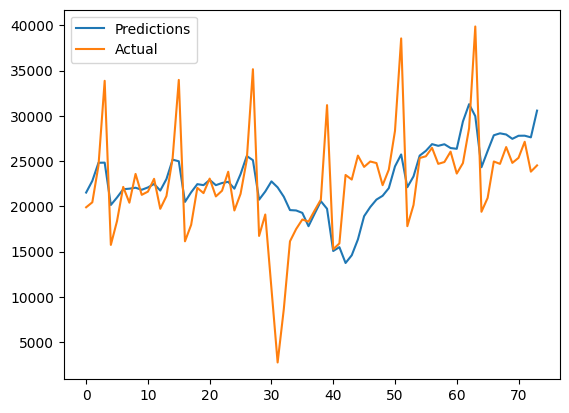

In [6]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predictions_actual = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.plot(predictions_actual, label='Predictions')
plt.plot(y_test_actual, label='Actual')
plt.legend()
plt.show()


# Fine tuning and hyperparameter tuning for the model
## Step 1 : Define a hyperparameter Search space

In [7]:
# Example hyperparameter search space
param_grid = {
    'lstm_units': [50, 100],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

## Step 2: Set Up Cross-Validation

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the hyperparameter search space
param_grid = {
    'lstm_units': [50, 100],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Use GridSearchCV with the custom wrapper function
param_search = GridSearchCV(keras_regressor, param_grid, scoring='neg_mean_squared_error', cv=3)
param_search.fit(X_train, y_train)

NameError: name 'keras_regressor' is not defined